In [1]:
# Evaluate FID to quantify generator success

In [2]:
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize

Using TensorFlow backend.


In [12]:
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.datasets.mnist import load_data
from skimage.transform import resize
from tensorflow.keras.datasets import cifar10
 
# scale an array of images to a new size
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        # resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)
        # store
        images_list.append(new_image)
    return asarray(images_list)

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = numpy.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid
 
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# load cifar10 images
(images1, _), (images2, _) = cifar10.load_data()
shuffle(images1)
n_samples = 500
images1 = images1[:n_samples]
images2 = images2[:n_samples]
print('Loaded', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# calculate fid
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)

KeyboardInterrupt: 

In [32]:
(images1, _), (images2, _) = cifar10.load_data()


In [33]:
print(images1.shape)

(50000, 32, 32, 3)


In [35]:
print(images1.shape)
import torch
from sklearn.decomposition import PCA

images1 = torch.Tensor(images1).reshape(50000, -1)
print(images1.shape)

(50000, 32, 32, 3)
torch.Size([50000, 3072])


In [36]:
mod = PCA().fit(images1)

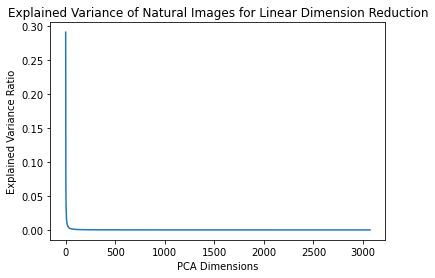

In [37]:
import matplotlib.pyplot as plt
plt.plot(mod.explained_variance_ratio_)
plt.xlabel('PCA Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Natural Images for Linear Dimension Reduction')
plt.show()

In [38]:
from numpy import cumsum

In [39]:
a = cumsum(mod.explained_variance_ratio_)

In [49]:
print(a)
print(a[98])

[0.2907663  0.40329774 0.47024188 ... 0.99999998 0.99999999 1.        ]
0.9003187633153626
